# Random Forest for STOCKHOLM

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Reshaping for Modeling
#### 4. Data Split
#### 5. Random Forest Model
#### 6. Uncovering Feature Importances

## 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Define path
path = r'C:\Users\16307\Desktop\CareerFoundry\Tasks - Machine Learning\ClimateWins Analysis\Data Sets'

In [6]:
# Import cleaned data
X = pd.read_csv(os.path.join(path, 'unscaled_cleaned_with_date.csv'), index_col = False)

In [7]:
# Read in the pleasant weather data
pleasant = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [8]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [9]:
X.shape

(22950, 137)

In [10]:
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pleasant.shape

(22950, 16)

## 2. Data Wrangling
- Reduce data to only STOCKHOLM weather station

In [13]:
# Create a list of "Stockholm" columns
stockholm_list = list(x for x in X.columns if x.find('STOCKHOLM') >=0)
stockholm_list

['STOCKHOLM_humidity',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [14]:
# Create dataframe 
df_stockholm = X[stockholm_list]
df_stockholm

,STOCKHOLM_humidity,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,0.98,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9
1,0.62,5,1.0114,0.05,0.06,0.0,4.0,3.0,5.0
2,0.69,5,1.0114,0.05,0.02,0.0,2.4,1.3,4.1
3,0.98,5,1.0114,0.05,0.00,0.0,1.2,0.4,2.3
4,0.96,5,1.0114,0.05,1.32,0.0,3.3,0.8,4.3
...,...,...,...,...,...,...,...,...,...
22945,0.98,5,1.0161,1.11,0.14,3.2,11.5,8.2,14.2
22946,1.00,5,1.0122,1.11,0.14,0.8,12.5,11.0,14.3
22947,0.85,5,1.0059,1.11,0.14,6.9,13.1,12.1,14.4
22948,0.94,5,1.0160,1.11,0.14,8.4,7.5,5.1,12.4


In [15]:
# Reduce pleasant weather dataset to stockholm columns
pleasant_stockholm = pleasant['STOCKHOLM_pleasant_weather']
pleasant_stockholm

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: STOCKHOLM_pleasant_weather, Length: 22950, dtype: int64

In [16]:
df_stockholm.shape # dataset has the correct shape

(22950, 9)

In [17]:
pleasant_stockholm.shape # dataset has the correct shape

(22950,)

## 3. Reshaping for Modeling

In [19]:
X2 = df_stockholm

In [20]:
y2 = pleasant_stockholm

In [21]:
# Turn X2 and y2 from df to arrays
X = np.array(X2)
y = np.array(y2)

## 4. Data Split 

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [24]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [25]:
X_train

array([[  0.48  ,   5.    ,   1.0192, ...,   8.5   ,   5.    ,  11.9   ],
       [  0.88  ,   5.    ,   1.0076, ...,  -6.9   ,  -9.4   ,  -4.6   ],
       [  0.77  ,   7.    ,   1.0134, ...,  -8.3   , -13.3   ,  -5.5   ],
       ...,
       [  0.72  ,   8.    ,   1.0033, ...,   7.5   ,   5.4   ,  10.    ],
       [  0.78  ,   8.    ,   1.0121, ...,   8.6   ,   6.1   ,  13.2   ],
       [  0.48  ,   6.    ,   1.0148, ...,   1.    ,  -0.1   ,   4.    ]])

In [26]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
X_test

array([[ 0.85  ,  5.    ,  0.9971, ..., 14.8   , 12.6   , 17.5   ],
       [ 0.71  ,  1.    ,  1.0397, ..., -2.    , -4.2   ,  0.9   ],
       [ 0.87  ,  8.    ,  1.0048, ..., 18.3   , 15.9   , 22.6   ],
       ...,
       [ 0.89  ,  8.    ,  1.0214, ...,  9.1   ,  7.9   , 11.2   ],
       [ 0.75  ,  6.    ,  1.018 , ..., -0.4   , -5.    ,  3.    ],
       [ 0.54  ,  8.    ,  1.0124, ..., 11.9   ,  9.8   , 15.9   ]])

In [28]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 5. Random Forest Model

In [30]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9998257232485186


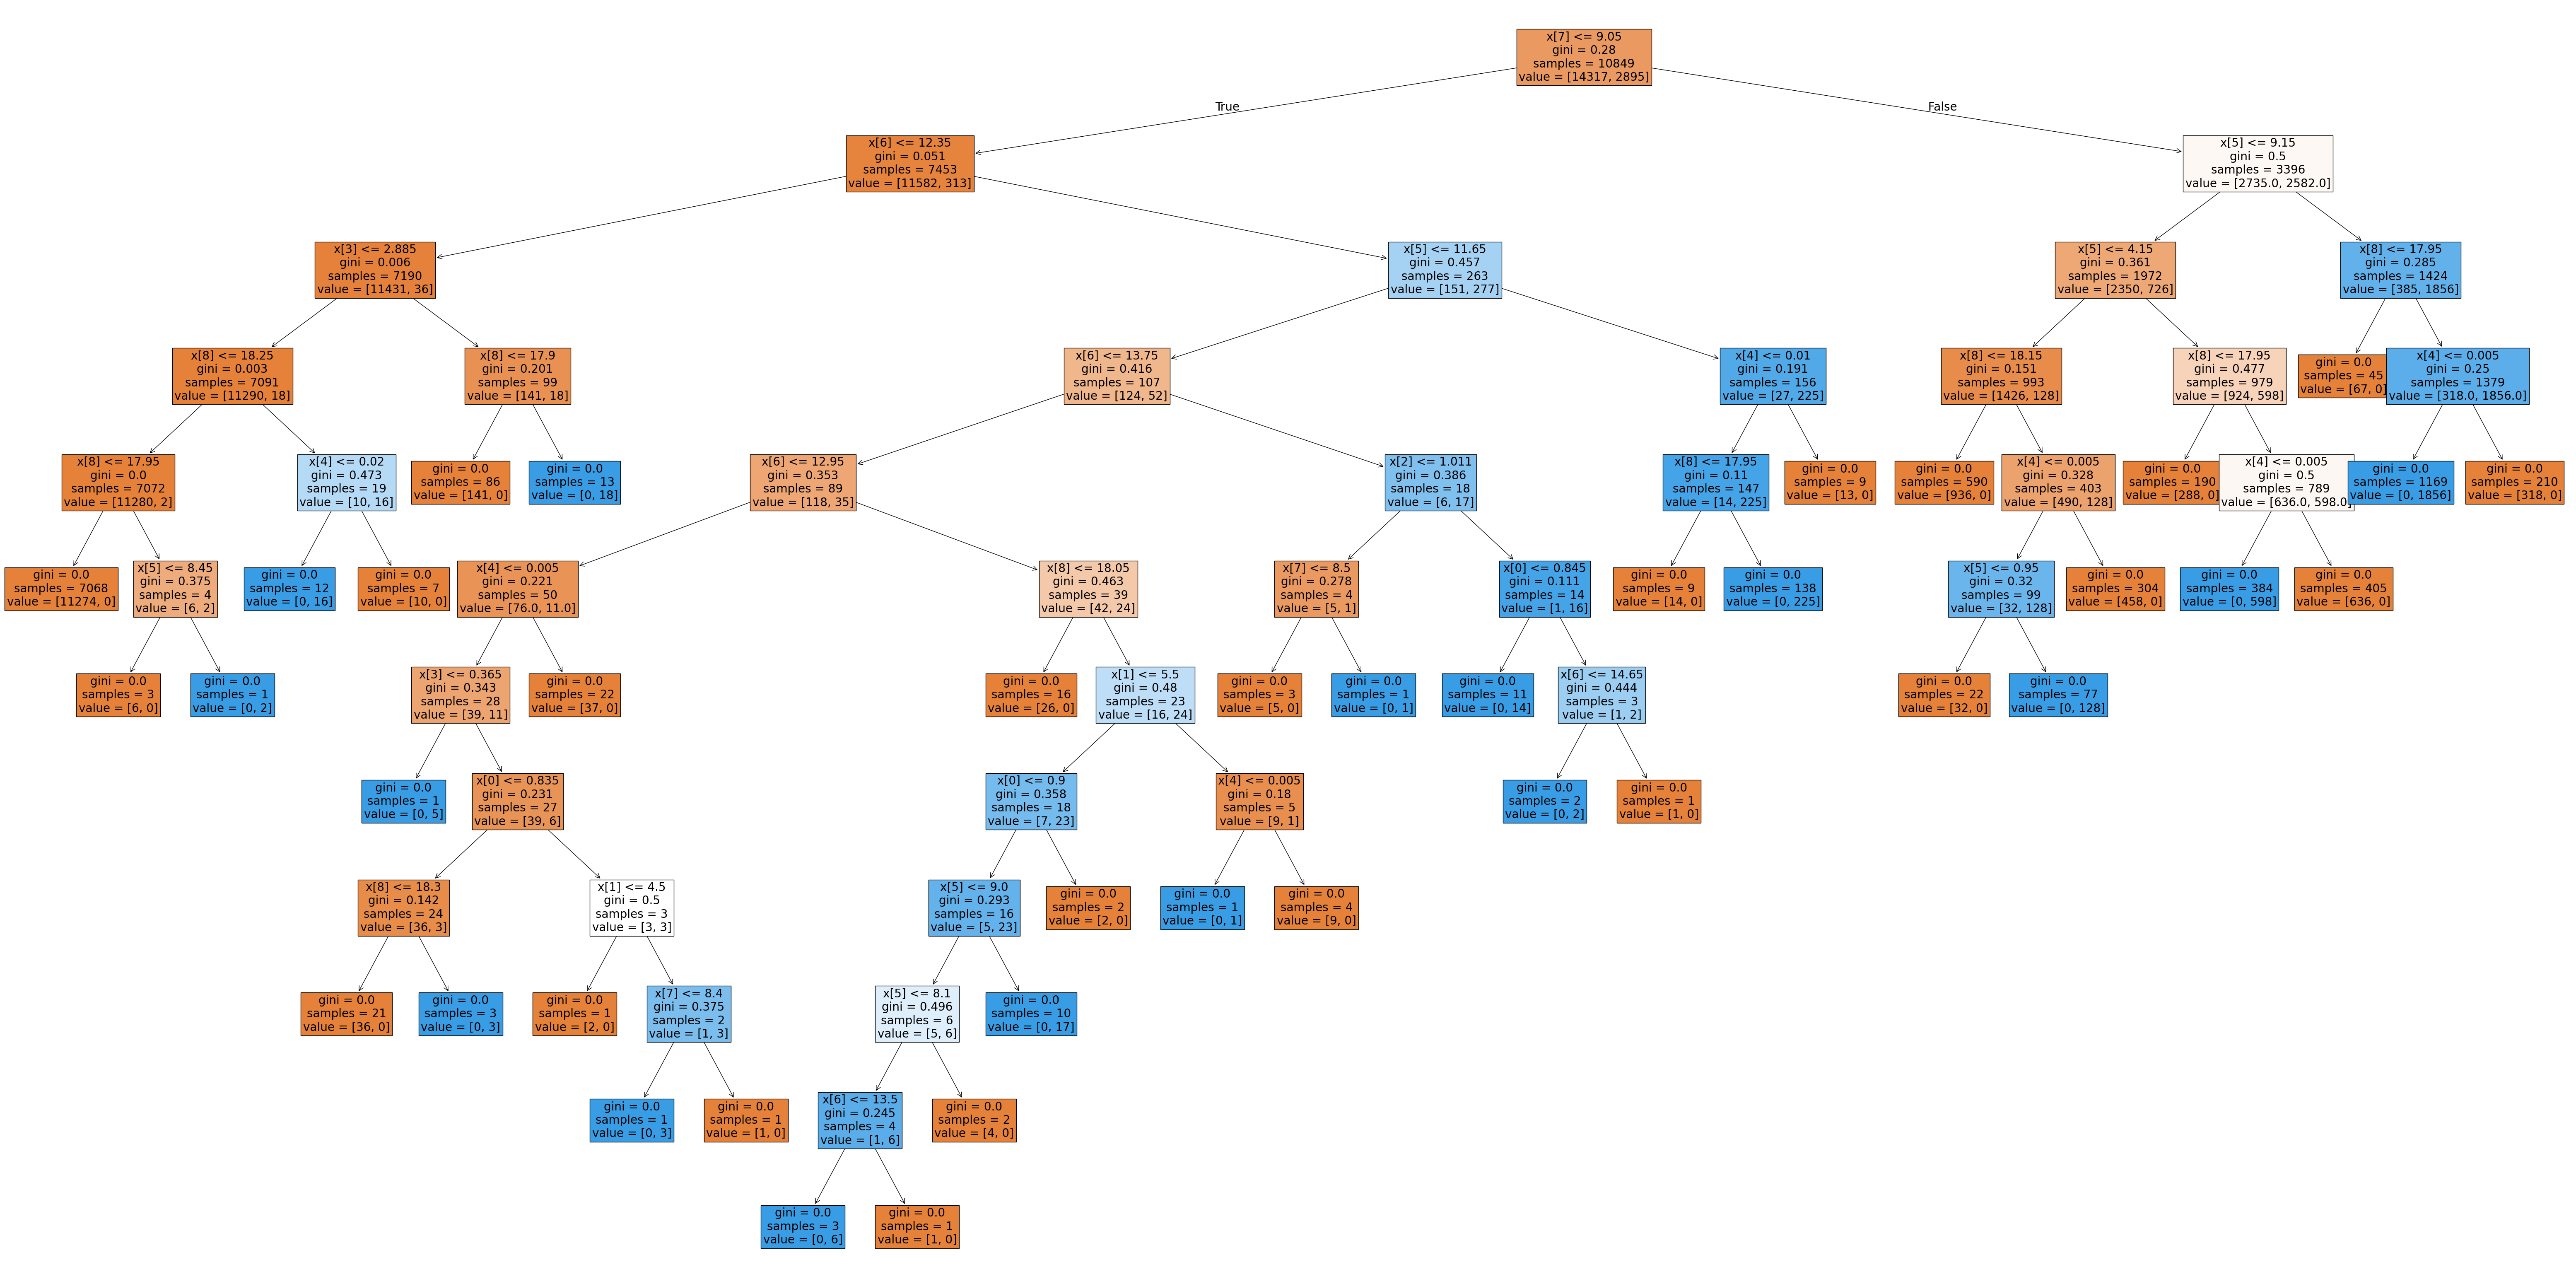

In [32]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [33]:
fig.savefig(os.path.join(path, 'random_forest_Stockholm.png'),bbox_inches='tight')

## 6. Uncovering Feature Importances

In [35]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.00248719, 0.01386531, 0.01433575, 0.08873361, 0.29902192,
       0.06825   , 0.15246729, 0.06951955, 0.2913194 ])

In [36]:
# Create a list of weather features
wx_list = [feature.replace('STOCKHOLM_', '') for feature in stockholm_list]
wx_list

['humidity',
 'cloud_cover',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [37]:
important = pd.Series(newarray, index = wx_list)
important

humidity            0.002487
cloud_cover         0.013865
pressure            0.014336
global_radiation    0.088734
precipitation       0.299022
sunshine            0.068250
temp_mean           0.152467
temp_min            0.069520
temp_max            0.291319
dtype: float64

In [38]:
important_sorted = important.sort_values(ascending=False)
important_sorted

precipitation       0.299022
temp_max            0.291319
temp_mean           0.152467
global_radiation    0.088734
temp_min            0.069520
sunshine            0.068250
pressure            0.014336
cloud_cover         0.013865
humidity            0.002487
dtype: float64

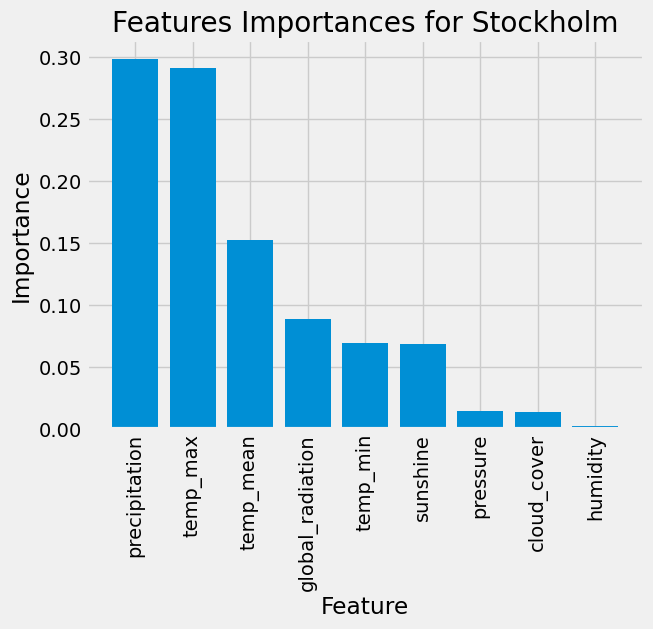

In [39]:
# Sort the features and their importances
sorted_indices = sorted(range(len(newarray)), key=lambda i: newarray[i], reverse=True)
sorted_newarray = [newarray[i] for i in sorted_indices]
sorted_wx_list = [wx_list[i] for i in sorted_indices]

# Plot the sorted results
%matplotlib inline
plt.style.use('fivethirtyeight')

# Create x locations for sorted features
x_values = list(range(len(sorted_newarray)))

plt.bar(x_values, sorted_newarray, orientation='vertical')
plt.xticks(x_values, sorted_wx_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Features Importances for Stockholm')

# Save the sorted plot
plt.savefig(os.path.join(path, 'Stockholm_feature_importances.png'), bbox_inches='tight')
plt.show()